In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import drive
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/dsa210data.xlsx')

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check column names
print("Available columns:", df.columns.tolist())

# Check data types
print("\nData types:")
print(df.dtypes)

# Check first few rows
print("\nFirst few rows:")
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Missing Values:
Date                  0
Homework/Project      0
School Time           0
Travel Time           0
Sleep Time            0
Sleep Quality         0
Social Interaction    0
Reddit Usage          0
Instagram Usage       0
Youtube Usage         0
dtype: int64
Available columns: ['Date', 'Homework/Project', 'School Time', 'Travel Time', 'Sleep Time', 'Sleep Quality', 'Social Interaction', 'Reddit Usage', 'Instagram Usage', 'Youtube Usage']

Data types:
Date                  datetime64[ns]
Homework/Project               int64
School Time                    int64
Travel Time                    int64
Sleep Time                     int64
Sleep Quality                float64
Social Interaction             int64
Reddit Usage                   int64
Instagram Usage                int64
Youtube Usage                  int64
dtype: object

First few rows:
    


HISTOGRAM VISUALIZATIONS


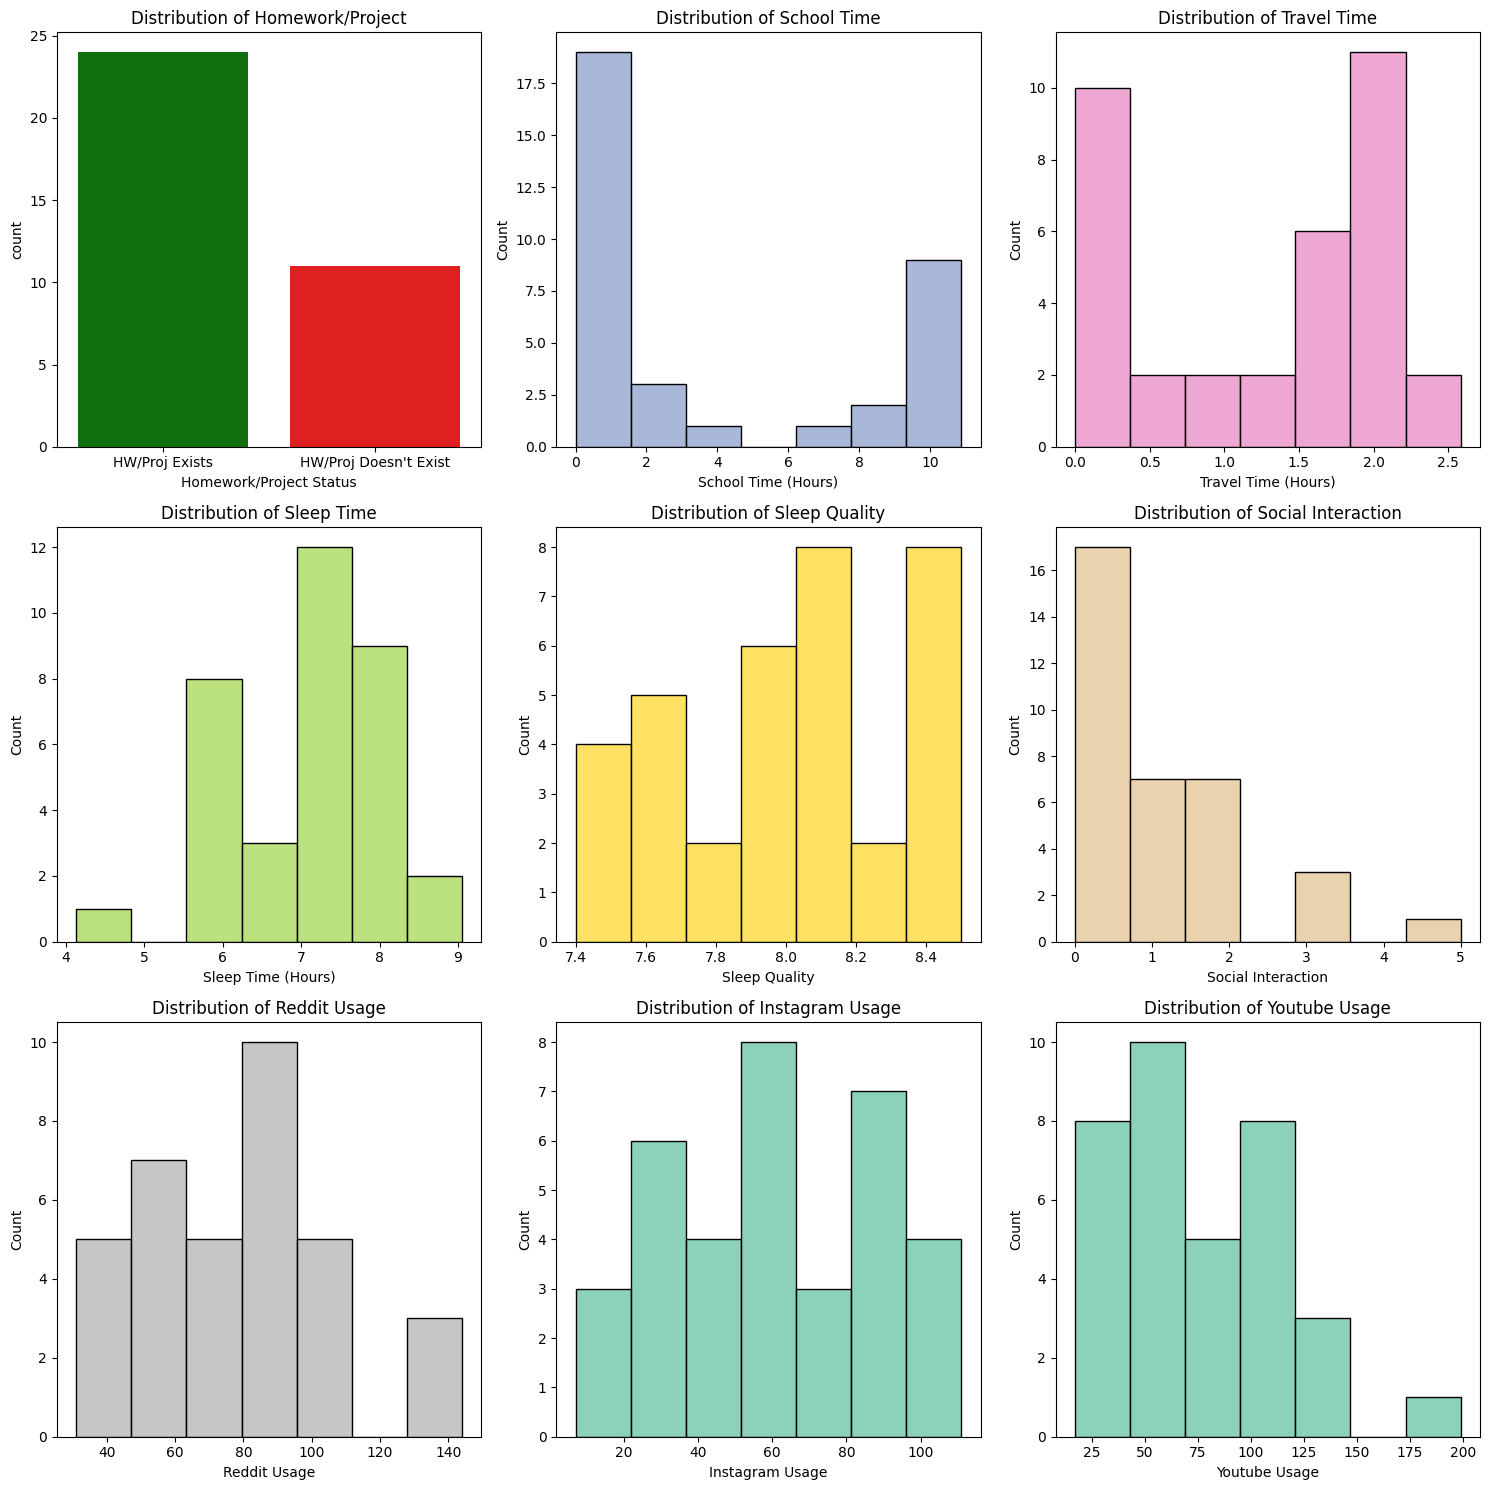

In [ ]:
# HISTOGRAM VISUALIZATIONS
print("\n" + "="*50)
print("HISTOGRAM VISUALIZATIONS")
print("="*50)

# Histograms for numerical columns (excluding Homework/Project)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

custom_colors = {
    'HW/Proj Exists': 'green',
    "HW/Proj Doesn't Exist": 'red'
}

# Get a color palette for the rest of the distributions
palette = sns.color_palette("Set2", len(numerical_cols))  # or "tab10"

# Calculate number of rows needed (3 plots per row)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3  # Ceiling division
temp_df = pd.DataFrame({'HW/Proj Label': df['Homework/Project'].map({1: 'HW/Proj Exists', 0: "HW/Proj Doesn't Exist"})})
# Create histograms
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 3, i)

    if col in ['School Time', 'Travel Time', 'Sleep Time']:
        # Convert minutes to hours
        temp_data = pd.DataFrame({col: df[col] / 60})
        sns.histplot(data=temp_data, x=col, color=palette[i % len(palette)])
        plt.xlabel(f'{col} (Hours)')

    elif col == 'Homework/Project':
        # Map binary values to labels
        temp_data = df[col].map({1: 'HW/Proj Exists', 0: "HW/Proj Doesn't Exist"})
        sns.countplot(data=temp_df, x='HW/Proj Label', hue='HW/Proj Label', palette=custom_colors, legend=False)
        plt.xlabel('Homework/Project Status')

    else:
        sns.histplot(data=df, x=col, color=palette[i % len(palette)])

    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


BOXPLOT VISUALIZATIONS


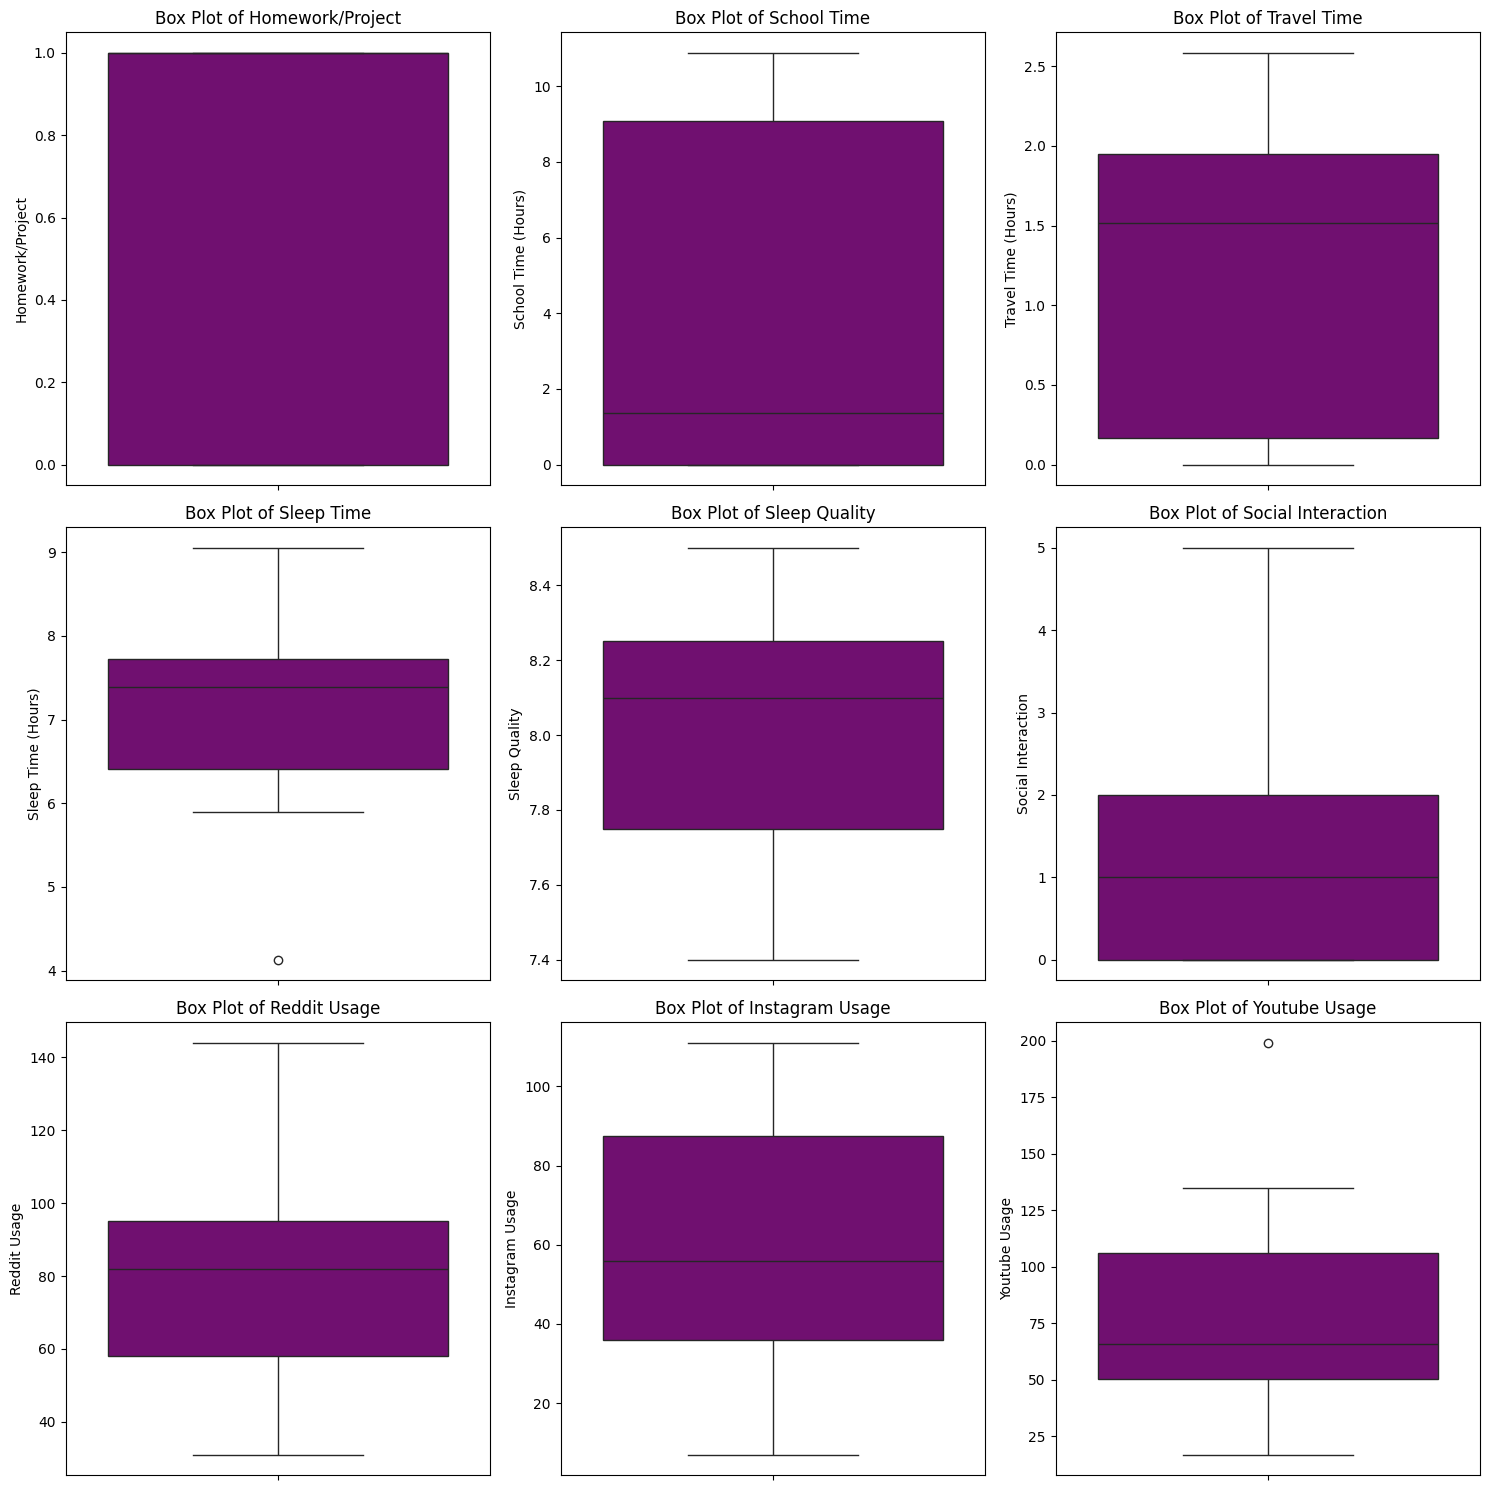

In [ ]:
print("\n" + "="*50)
print("BOXPLOT VISUALIZATIONS")
print("="*50)

# Box plots for numerical columns (excluding Homework/Project)
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 3, i)
    if col in ['School Time', 'Travel Time', 'Sleep Time']:
        # Convert to hours
        temp_data = pd.DataFrame({col: df[col] / 60})
        sns.boxplot(data=temp_data, y=col, color='purple')
        plt.ylabel(f'{col} (Hours)')
    else:
        sns.boxplot(data=df, y=col, color='purple')
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


CORRELATION VISUALIZATIONS


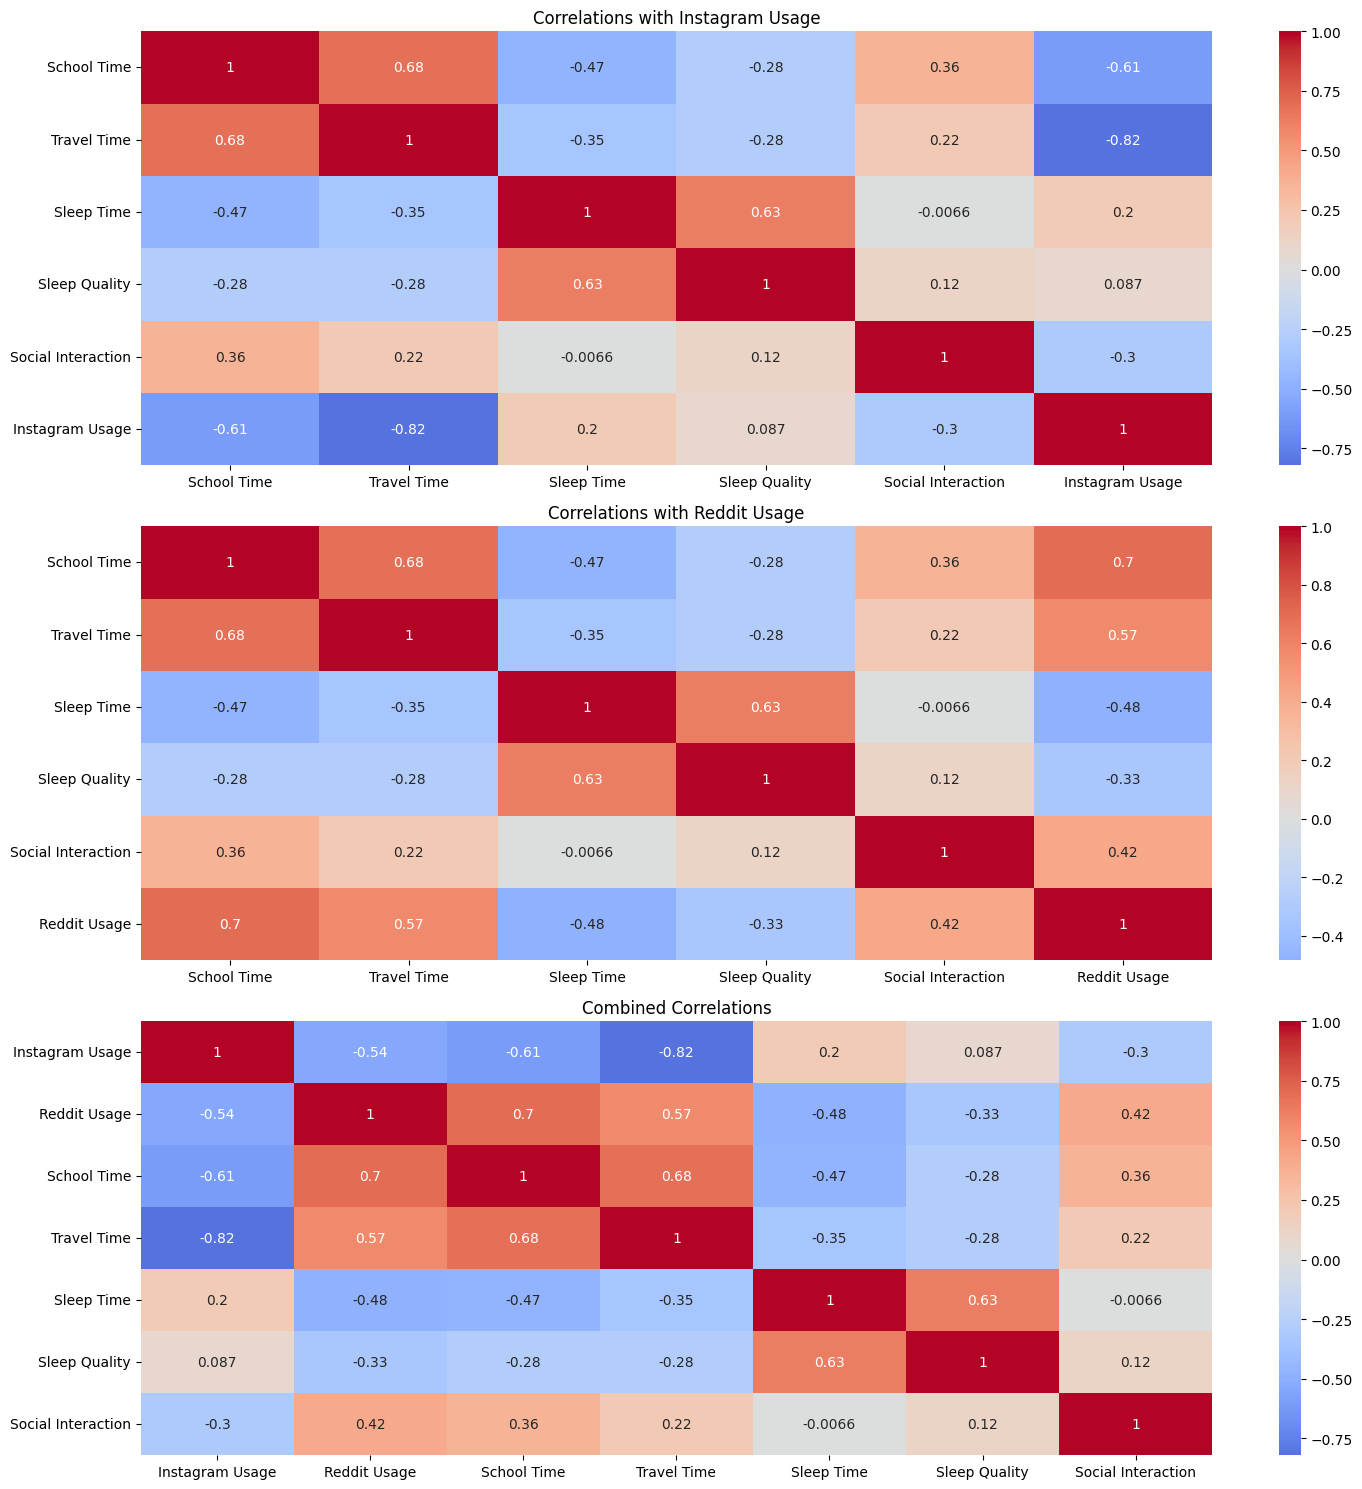

In [ ]:
# CORRELATION VISUALIZATIONS
print("\n" + "="*50)
print("CORRELATION VISUALIZATIONS")
print("="*50)

# Create correlation matrices for different combinations
# 1. Instagram correlations
instagram_corr = df[['School Time', 'Travel Time', 'Sleep Time', 'Sleep Quality',
                    'Social Interaction', 'Instagram Usage']].corr()

# 2. Reddit correlations
reddit_corr = df[['School Time', 'Travel Time', 'Sleep Time', 'Sleep Quality',
                  'Social Interaction', 'Reddit Usage']].corr()

# 3. Combined correlations
combined_corr = df[['Instagram Usage', 'Reddit Usage', 'School Time', 'Travel Time',
                   'Sleep Time', 'Sleep Quality', 'Social Interaction']].corr()

# Visualize correlation matrices in a 3x1 layout
plt.figure(figsize=(15, 15))

# Instagram correlations
plt.subplot(3, 1, 1)
sns.heatmap(instagram_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlations with Instagram Usage')

# Reddit correlations
plt.subplot(3, 1, 2)
sns.heatmap(reddit_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlations with Reddit Usage')

# Combined correlations
plt.subplot(3, 1, 3)
sns.heatmap(combined_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Combined Correlations')

plt.tight_layout()
plt.show()

Daily Averages (Time in Hours):
School Time         3.91
Travel Time         1.21
Sleep Time          7.14
Instagram Usage    60.57
Reddit Usage       79.83
dtype: float64


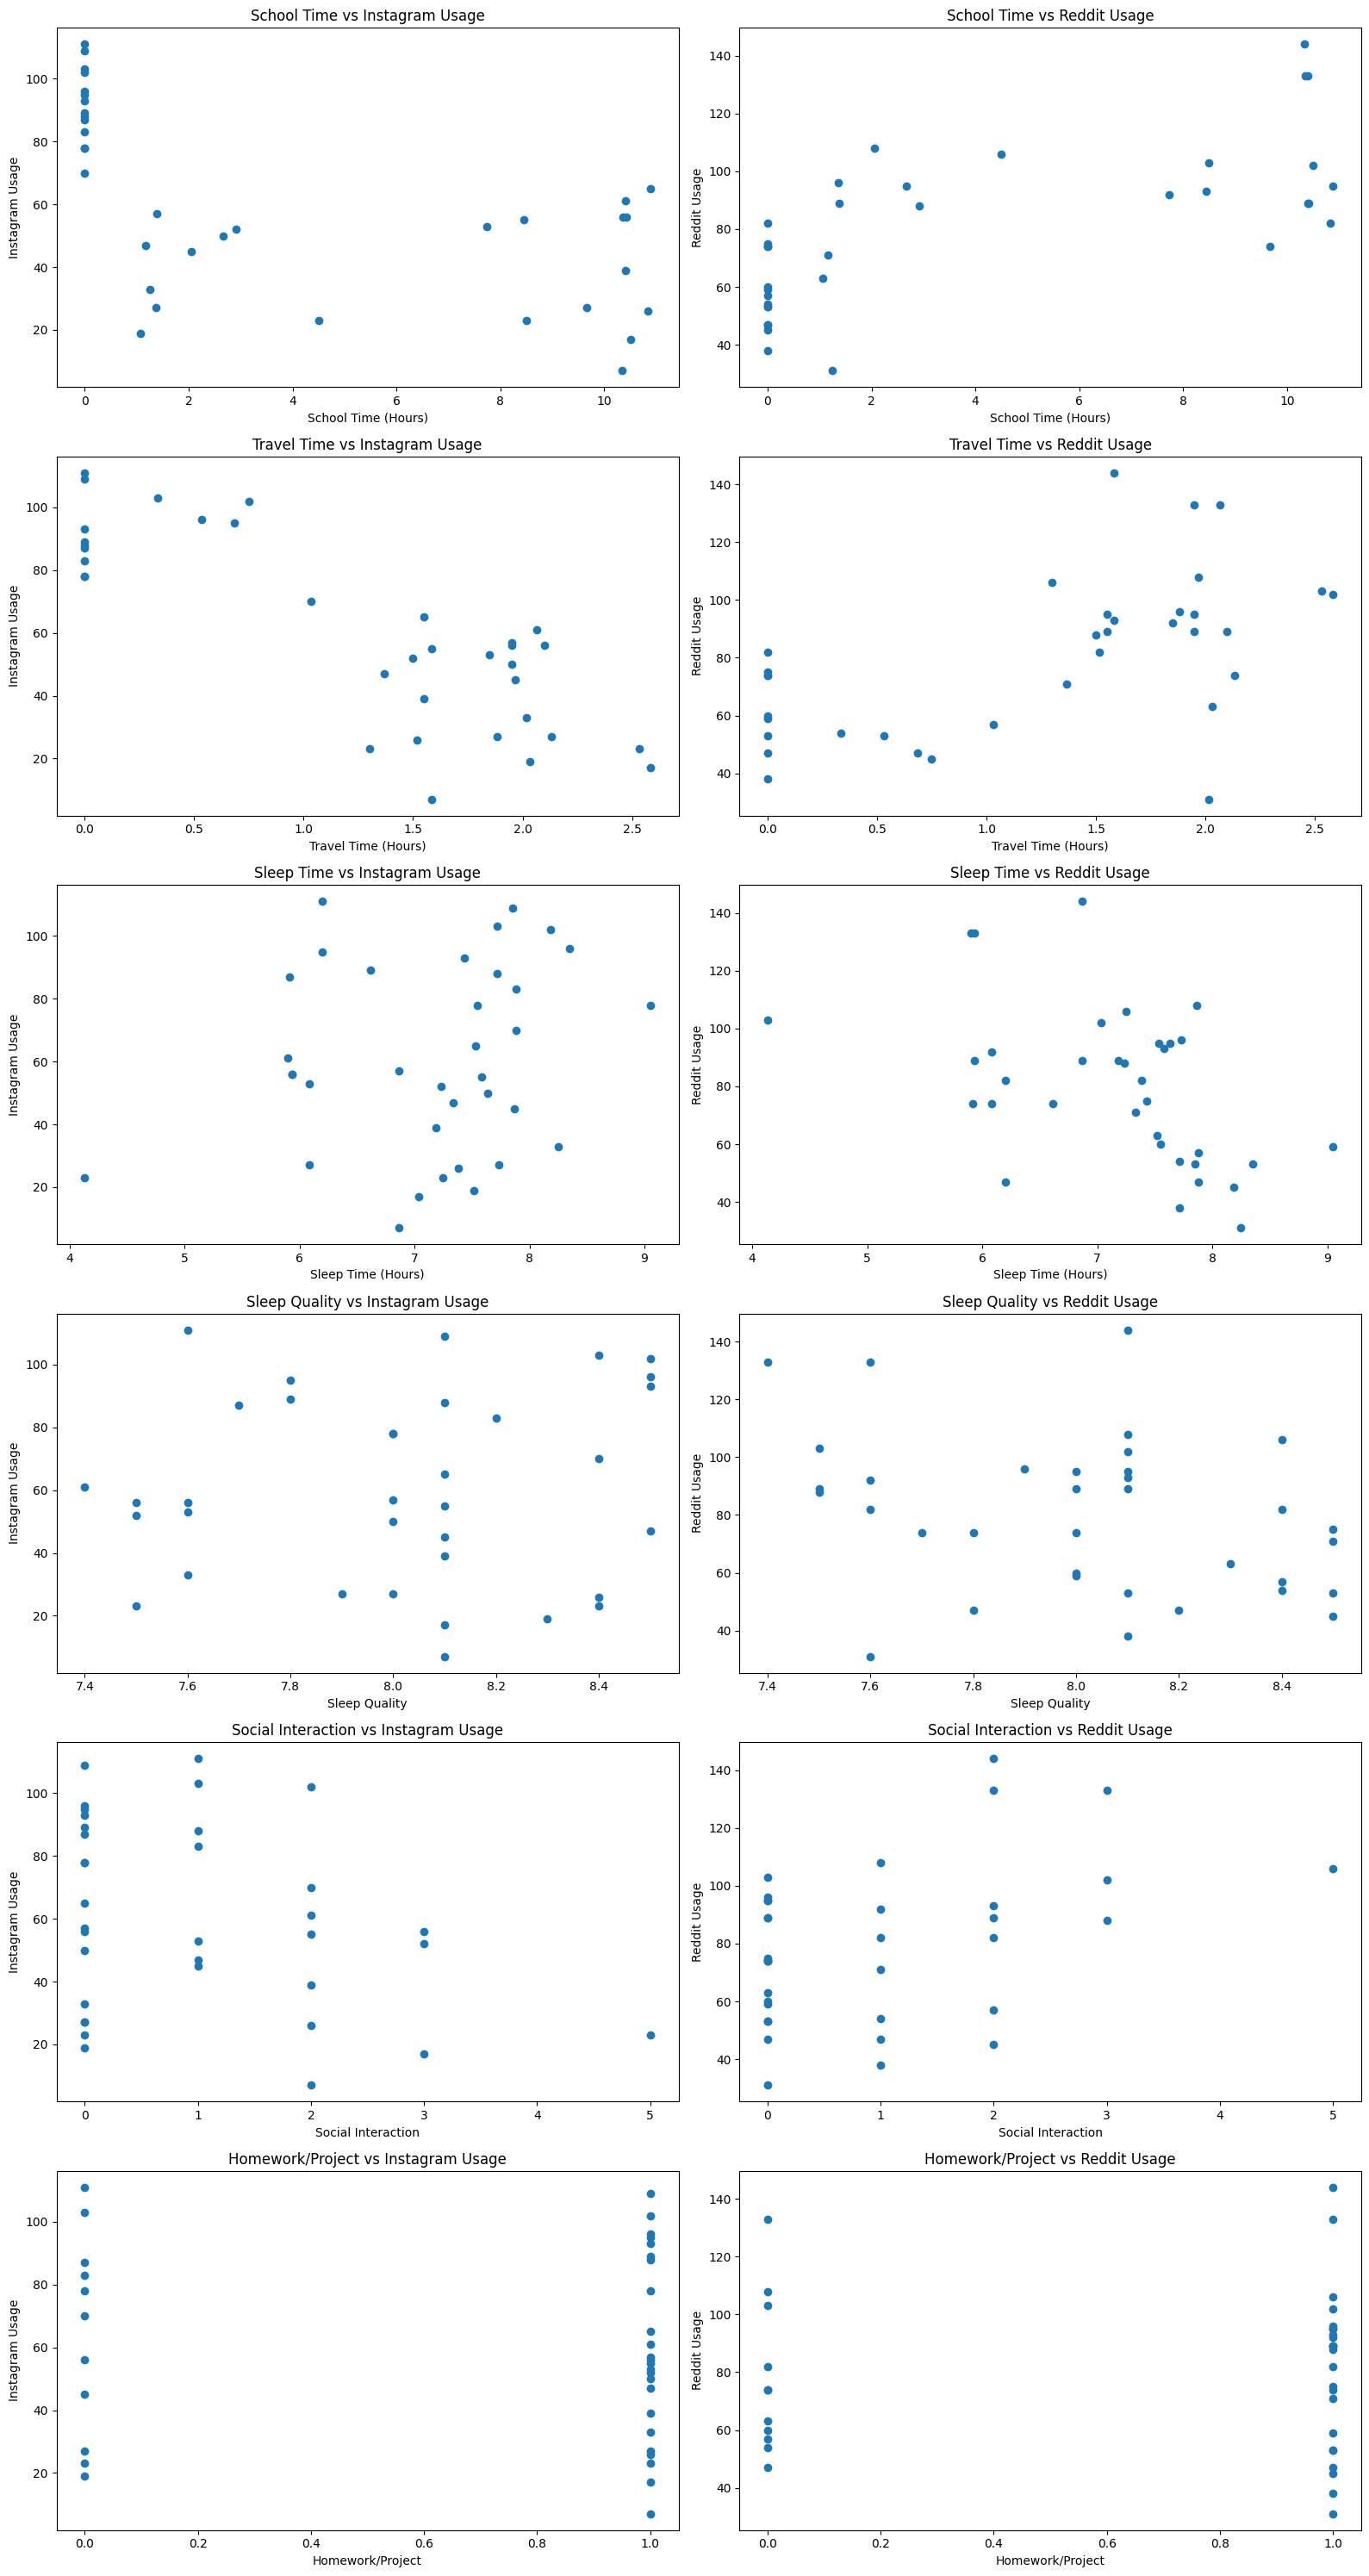

In [ ]:
# Calculate average metrics for different activities
daily_averages = df.agg({
    'School Time': lambda x: (x.mean()/60).round(2),  # Convert to hours
    'Travel Time': lambda x: (x.mean()/60).round(2),  # Convert to hours
    'Sleep Time': lambda x: (x.mean()/60).round(2),   # Convert to hours
    'Instagram Usage': 'mean',
    'Reddit Usage': 'mean'
}).round(2)

print("Daily Averages (Time in Hours):")
print(daily_averages)

fig, axes = plt.subplots(6, 2, figsize=(16, 30))  # 6 rows, 2 cols; bigger height
axes = axes.flatten()  # Flatten to make indexing easier

# Define your x and y variables with labels
plot_info = [
    ('School Time', 'Instagram Usage'),
    ('School Time', 'Reddit Usage'),
    ('Travel Time', 'Instagram Usage'),
    ('Travel Time', 'Reddit Usage'),
    ('Sleep Time', 'Instagram Usage'),
    ('Sleep Time', 'Reddit Usage'),
    ('Sleep Quality', 'Instagram Usage'),
    ('Sleep Quality', 'Reddit Usage'),
    ('Social Interaction', 'Instagram Usage'),
    ('Social Interaction', 'Reddit Usage'),
    ('Homework/Project', 'Instagram Usage'),
    ('Homework/Project', 'Reddit Usage'),
]

# Plot each pair
for i, (x_var, y_var) in enumerate(plot_info):
    # Convert minutes to hours for time-based columns
    if x_var in ['School Time', 'Travel Time', 'Sleep Time']:
        x_data = df[x_var] / 60
        x_label = f"{x_var} (Hours)"
    else:
        x_data = df[x_var]
        x_label = x_var

    axes[i].scatter(x_data, df[y_var])
    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_var)
    axes[i].set_title(f"{x_var} vs {y_var}")

plt.tight_layout()
plt.show()

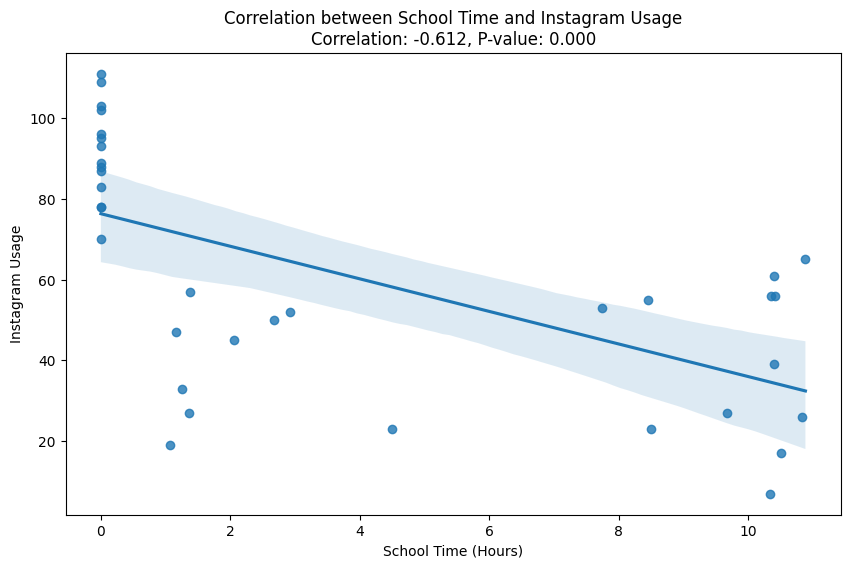


Correlation Analysis: School Time vs Instagram Usage
Correlation coefficient: -0.612
P-value: 0.000
This correlation is statistically significant (p < 0.05)
--------------------------------------------------


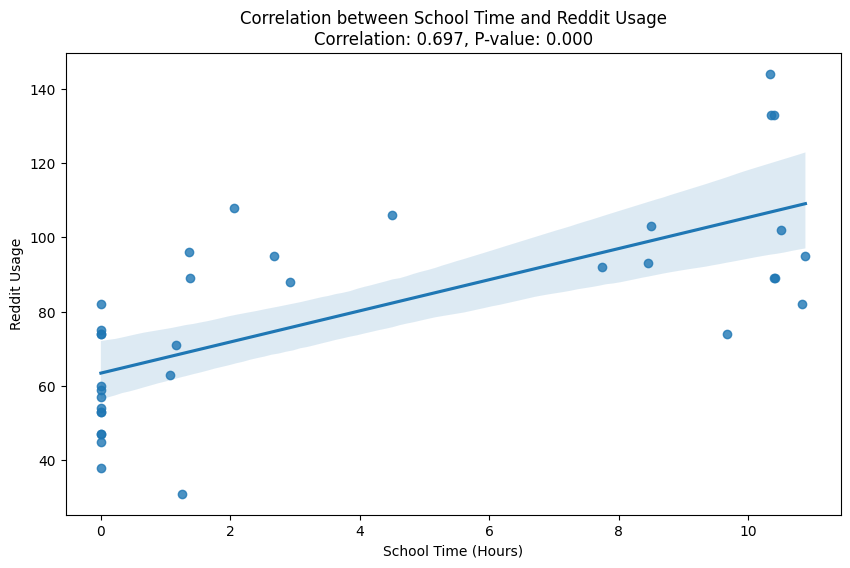


Correlation Analysis: School Time vs Reddit Usage
Correlation coefficient: 0.697
P-value: 0.000
This correlation is statistically significant (p < 0.05)
--------------------------------------------------


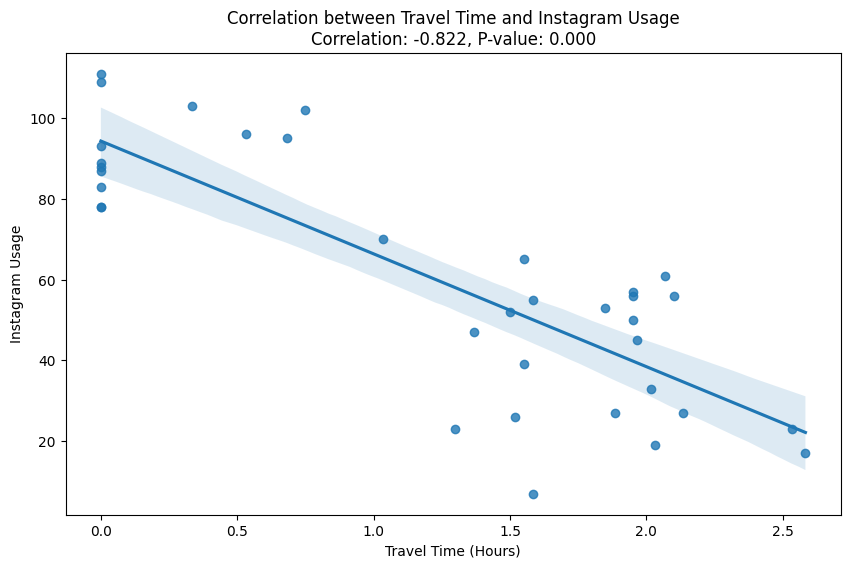


Correlation Analysis: Travel Time vs Instagram Usage
Correlation coefficient: -0.822
P-value: 0.000
This correlation is statistically significant (p < 0.05)
--------------------------------------------------


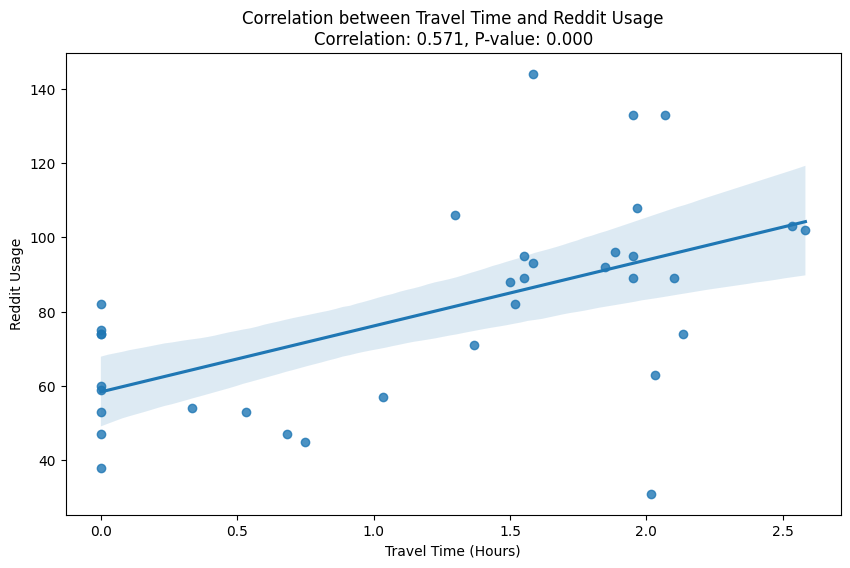


Correlation Analysis: Travel Time vs Reddit Usage
Correlation coefficient: 0.571
P-value: 0.000
This correlation is statistically significant (p < 0.05)
--------------------------------------------------


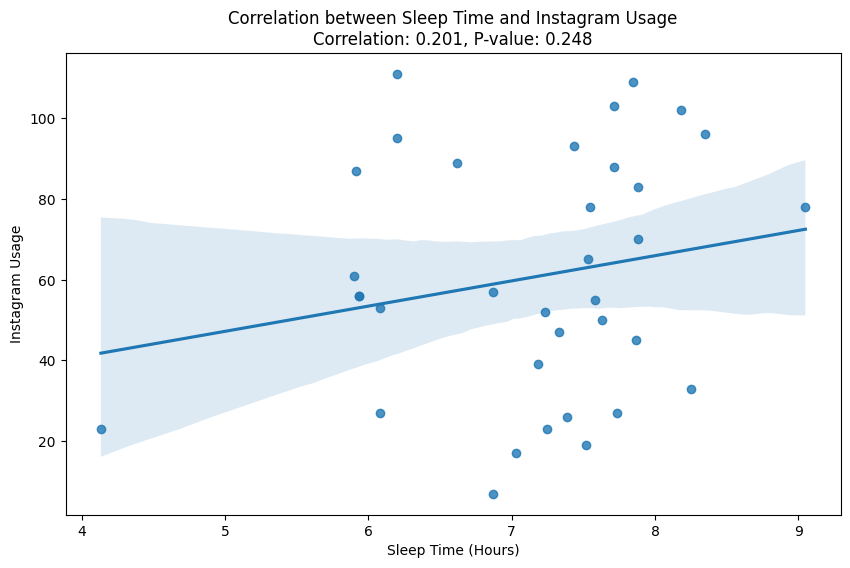


Correlation Analysis: Sleep Time vs Instagram Usage
Correlation coefficient: 0.201
P-value: 0.248
This correlation is not statistically significant (p >= 0.05)
--------------------------------------------------


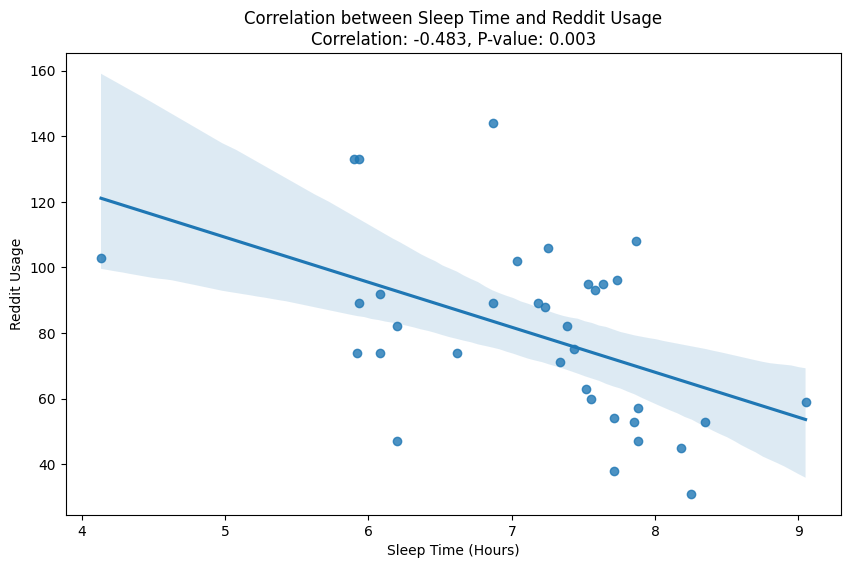


Correlation Analysis: Sleep Time vs Reddit Usage
Correlation coefficient: -0.483
P-value: 0.003
This correlation is statistically significant (p < 0.05)
--------------------------------------------------


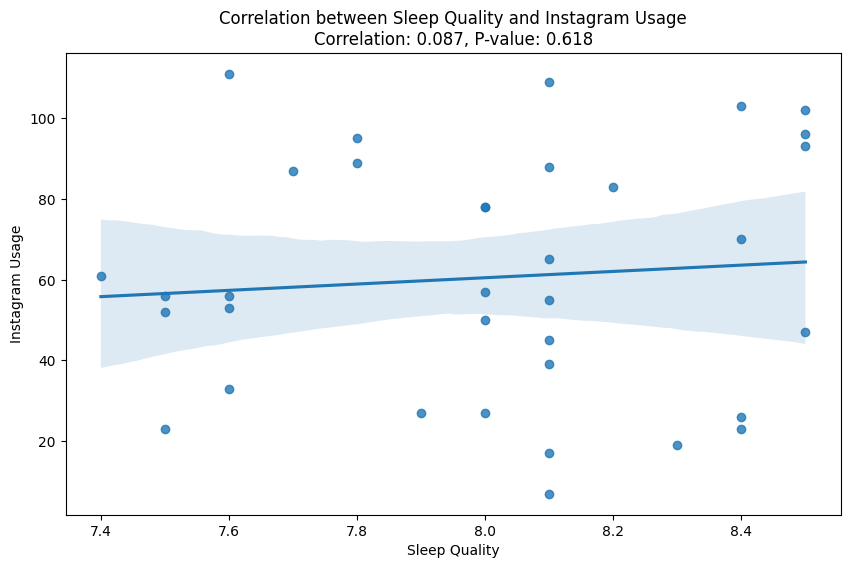


Correlation Analysis: Sleep Quality vs Instagram Usage
Correlation coefficient: 0.087
P-value: 0.618
This correlation is not statistically significant (p >= 0.05)
--------------------------------------------------


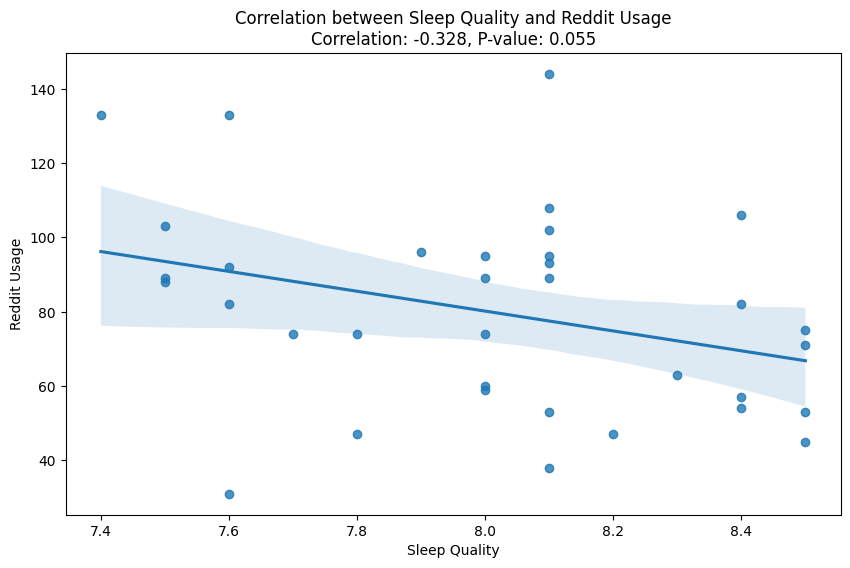


Correlation Analysis: Sleep Quality vs Reddit Usage
Correlation coefficient: -0.328
P-value: 0.055
This correlation is not statistically significant (p >= 0.05)
--------------------------------------------------


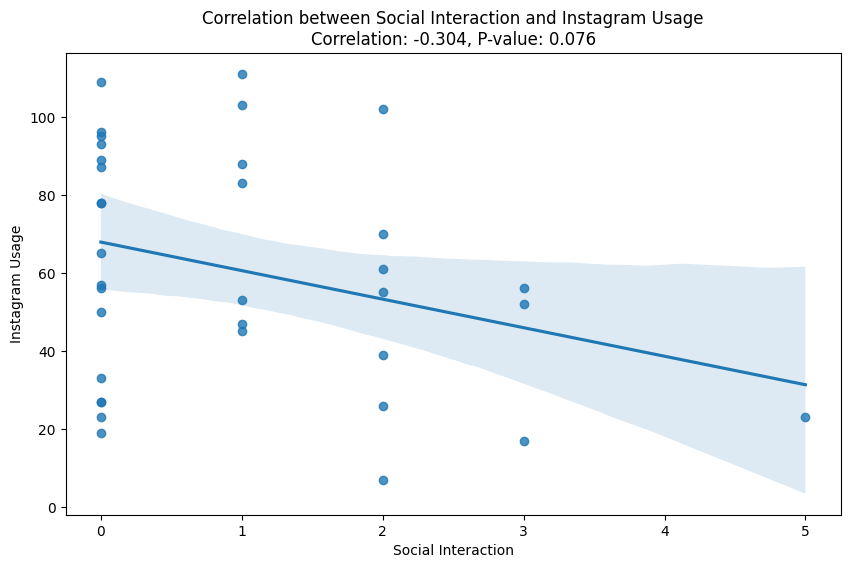


Correlation Analysis: Social Interaction vs Instagram Usage
Correlation coefficient: -0.304
P-value: 0.076
This correlation is not statistically significant (p >= 0.05)
--------------------------------------------------


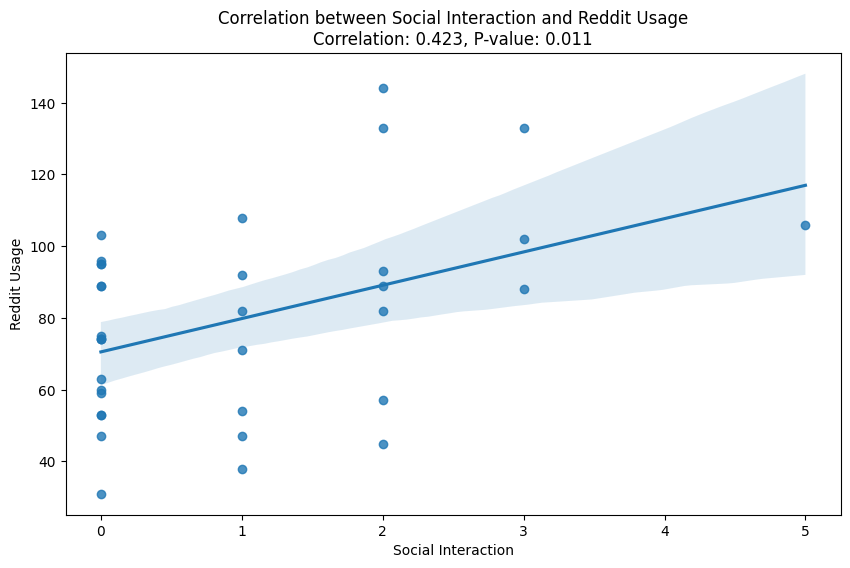


Correlation Analysis: Social Interaction vs Reddit Usage
Correlation coefficient: 0.423
P-value: 0.011
This correlation is statistically significant (p < 0.05)
--------------------------------------------------


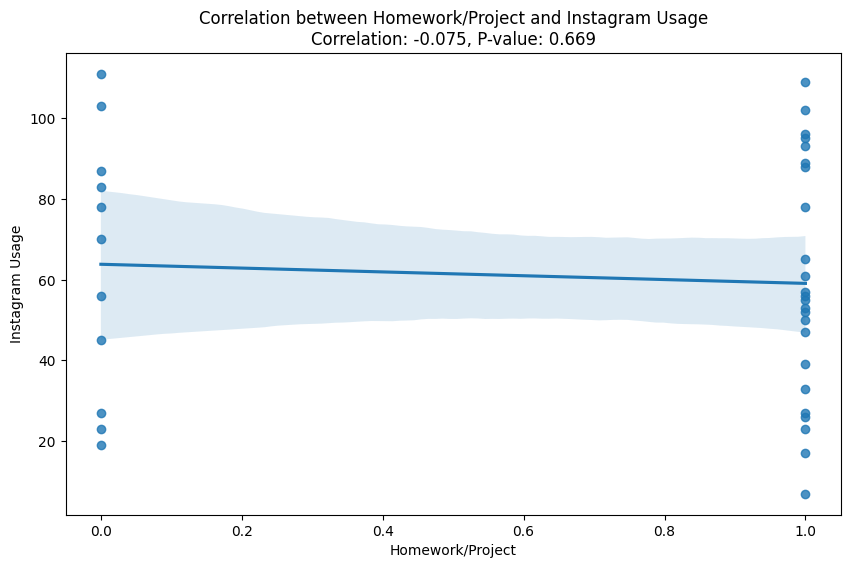


Correlation Analysis: Homework/Project vs Instagram Usage
Correlation coefficient: -0.075
P-value: 0.669
This correlation is not statistically significant (p >= 0.05)
--------------------------------------------------


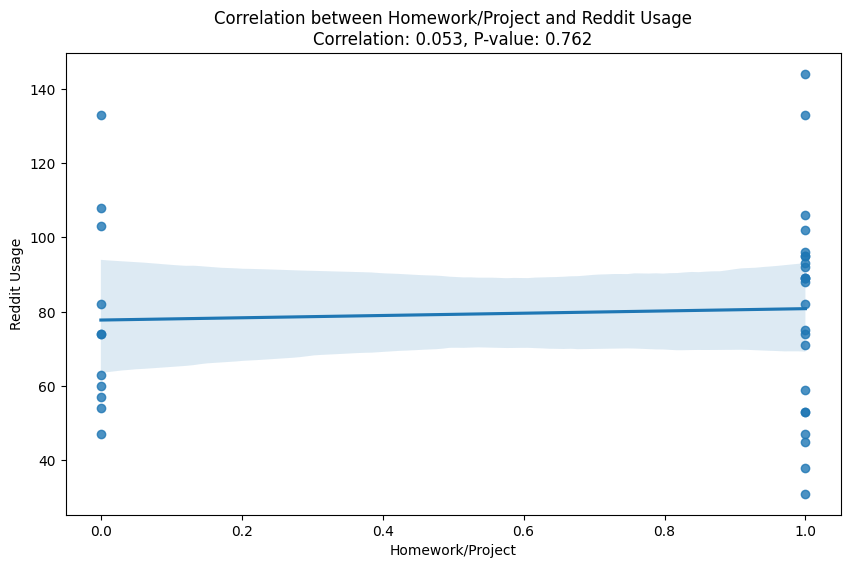


Correlation Analysis: Homework/Project vs Reddit Usage
Correlation coefficient: 0.053
P-value: 0.762
This correlation is not statistically significant (p >= 0.05)
--------------------------------------------------


In [ ]:
# List of pairs to analyze
pairs = [
    ('School Time', 'Instagram Usage'),
    ('School Time', 'Reddit Usage'),
    ('Travel Time', 'Instagram Usage'),
    ('Travel Time', 'Reddit Usage'),
    ('Sleep Time', 'Instagram Usage'),
    ('Sleep Time', 'Reddit Usage'),
    ('Sleep Quality', 'Instagram Usage'),
    ('Sleep Quality', 'Reddit Usage')
]

# Perform correlation analysis and create scatter plots for each pair
for time_var, usage_var in pairs:
    # Calculate correlation
    corr_coef, p_value = stats.pearsonr(df[time_var], df[usage_var])

    # Create scatter plot with regression line
    plt.figure(figsize=(10, 6))
    if time_var in ['School Time', 'Travel Time', 'Sleep Time']:
        # Convert time to hours for display
        sns.regplot(x=df[time_var]/60, y=df[usage_var], data=df)
        plt.xlabel(f'{time_var} (Hours)')
    else:
        sns.regplot(x=df[time_var], y=df[usage_var], data=df)
        plt.xlabel(time_var)

    plt.ylabel(usage_var)
    plt.title(f'Correlation between {time_var} and {usage_var}\n'
              f'Correlation: {corr_coef:.3f}, P-value: {p_value:.3f}')
    plt.show()

    # Print detailed statistics
    print(f"\nCorrelation Analysis: {time_var} vs {usage_var}")
    print(f"Correlation coefficient: {corr_coef:.3f}")
    print(f"P-value: {p_value:.3f}")
    if p_value < 0.05:
        print("This correlation is statistically significant (p < 0.05)")
    else:
        print("This correlation is not statistically significant (p >= 0.05)")
    print("-" * 50)

#additional pairs

additional_pairs = [
    ('Social Interaction', 'Instagram Usage'),
    ('Social Interaction', 'Reddit Usage'),
    ('Homework/Project' ,'Instagram Usage'),
    ('Homework/Project', 'Reddit Usage'),
]

# Perform correlation analysis and create scatter plots for each new pair
for time_var, usage_var in additional_pairs:
    # Calculate correlation
    corr_coef, p_value = stats.pearsonr(df[time_var], df[usage_var])

    # Create scatter plot with regression line
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df[time_var], y=df[usage_var], data=df)
    plt.xlabel(time_var)
    plt.ylabel(usage_var)
    plt.title(f'Correlation between {time_var} and {usage_var}\n'
              f'Correlation: {corr_coef:.3f}, P-value: {p_value:.3f}')
    plt.show()

    # Print detailed statistics
    print(f"\nCorrelation Analysis: {time_var} vs {usage_var}")
    print(f"Correlation coefficient: {corr_coef:.3f}")
    print(f"P-value: {p_value:.3f}")
    if p_value < 0.05:
        print("This correlation is statistically significant (p < 0.05)")
    else:
        print("This correlation is not statistically significant (p >= 0.05)")
    print("-" * 50)



In [ ]:
# STATISTICAL TEST RESULTS
print("\n" + "="*50)
print("STATISTICAL TEST RESULTS")
print("="*50)

# Define variables to test against Instagram and Reddit
variables_to_test = ['School Time', 'Travel Time', 'Sleep Time', 'Sleep Quality', 'Social Interaction']

# Function to perform statistical tests
def perform_statistical_tests(time_var, usage_var):
    print(f"\n{'='*50}")
    print(f"Statistical Tests for {time_var} vs {usage_var}")
    print(f"{'='*50}")

    # 1. Chi-Square Test
    time_median = df[time_var].median()
    usage_median = df[usage_var].median()

    contingency_table = pd.crosstab(
        df[time_var] > time_median,
        df[usage_var] > usage_median
    )

    chi2, p_chi, dof, expected = stats.chi2_contingency(contingency_table)
    print("\nChi-Square Test:")
    print(f"Chi2 statistic: {chi2:.3f}")
    print(f"P-value: {p_chi:.3f}")

    # 2. T-Test
    high_time = df[df[time_var] > time_median][usage_var]
    low_time = df[df[time_var] <= time_median][usage_var]

    t_stat, p_t = stats.ttest_ind(high_time, low_time)
    print("\nT-Test:")
    print(f"T-statistic: {t_stat:.3f}")
    print(f"P-value: {p_t:.3f}")

    # Print interpretation
    print("\nInterpretation:")
    if p_chi < 0.05:
        print("- Chi-Square: Significant relationship found")
    if p_t < 0.05:
        print("- T-Test: Significant difference in means found")
    if p_chi >= 0.05 and p_t >= 0.05:
        print("- No significant relationships found in any test")


STATISTICAL TEST RESULTS


In [ ]:
# Perform tests for Instagram
print("\n" + "="*50)
print("STATISTICAL TESTS FOR INSTAGRAM USAGE")
print("="*50)
for var in variables_to_test:
    perform_statistical_tests(var, 'Instagram Usage')



STATISTICAL TESTS FOR INSTAGRAM USAGE

Statistical Tests for School Time vs Instagram Usage

Chi-Square Test:
Chi2 statistic: 10.362
P-value: 0.001

T-Test:
T-statistic: -4.529
P-value: 0.000

Interpretation:
- Chi-Square: Significant relationship found
- T-Test: Significant difference in means found

Statistical Tests for Travel Time vs Instagram Usage

Chi-Square Test:
Chi2 statistic: 10.362
P-value: 0.001

T-Test:
T-statistic: -5.073
P-value: 0.000

Interpretation:
- Chi-Square: Significant relationship found
- T-Test: Significant difference in means found

Statistical Tests for Sleep Time vs Instagram Usage

Chi-Square Test:
Chi2 statistic: 2.303
P-value: 0.129

T-Test:
T-statistic: 1.941
P-value: 0.061

Interpretation:
- No significant relationships found in any test

Statistical Tests for Sleep Quality vs Instagram Usage

Chi-Square Test:
Chi2 statistic: 0.232
P-value: 0.630

T-Test:
T-statistic: 0.702
P-value: 0.487

Interpretation:
- No significant relationships found in any t

In [ ]:
# Perform tests for Reddit
print("\n" + "="*50)
print("STATISTICAL TESTS FOR REDDIT USAGE")
print("="*50)
for var in variables_to_test:
    perform_statistical_tests(var, 'Reddit Usage')


STATISTICAL TESTS FOR REDDIT USAGE

Statistical Tests for School Time vs Reddit Usage

Chi-Square Test:
Chi2 statistic: 20.867
P-value: 0.000

T-Test:
T-statistic: 6.805
P-value: 0.000

Interpretation:
- Chi-Square: Significant relationship found
- T-Test: Significant difference in means found

Statistical Tests for Travel Time vs Reddit Usage

Chi-Square Test:
Chi2 statistic: 15.125
P-value: 0.000

T-Test:
T-statistic: 4.096
P-value: 0.000

Interpretation:
- Chi-Square: Significant relationship found
- T-Test: Significant difference in means found

Statistical Tests for Sleep Time vs Reddit Usage

Chi-Square Test:
Chi2 statistic: 2.378
P-value: 0.123

T-Test:
T-statistic: -3.333
P-value: 0.002

Interpretation:
- T-Test: Significant difference in means found

Statistical Tests for Sleep Quality vs Reddit Usage

Chi-Square Test:
Chi2 statistic: 5.322
P-value: 0.021

T-Test:
T-statistic: -2.099
P-value: 0.044

Interpretation:
- Chi-Square: Significant relationship found
- T-Test: Signif

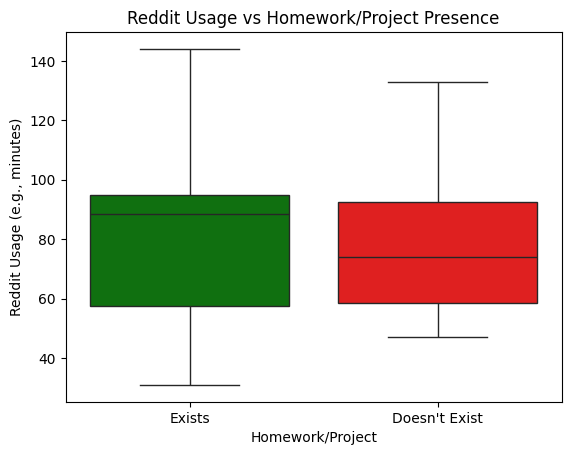

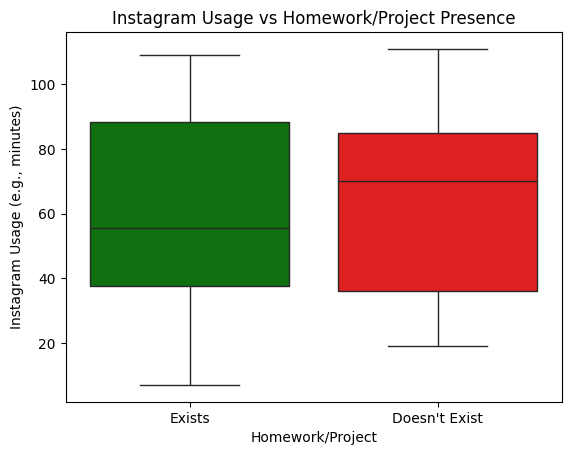

In [ ]:
custom_palette = {"Doesn't Exist": 'red', 'Exists': 'green'}

# Ensure the label column exists
df['HW/Proj Label'] = df['Homework/Project'].map({0: "Doesn't Exist", 1: 'Exists'})

# Reddit Usage
sns.boxplot(data=df, x='HW/Proj Label', y='Reddit Usage', hue='HW/Proj Label', palette=custom_palette, legend=False)
plt.title('Reddit Usage vs Homework/Project Presence')
plt.ylabel('Reddit Usage (e.g., minutes)')
plt.xlabel('Homework/Project')
plt.show()

# Instagram Usage
sns.boxplot(data=df, x='HW/Proj Label', y='Instagram Usage', hue='HW/Proj Label', palette=custom_palette, legend=False)
plt.title('Instagram Usage vs Homework/Project Presence')
plt.ylabel('Instagram Usage (e.g., minutes)')
plt.xlabel('Homework/Project')
plt.show()

Linear Regression (YouTube Usage):
 - RMSE: 50.70
 - MAE: 38.86
 - R² Score: 0.21


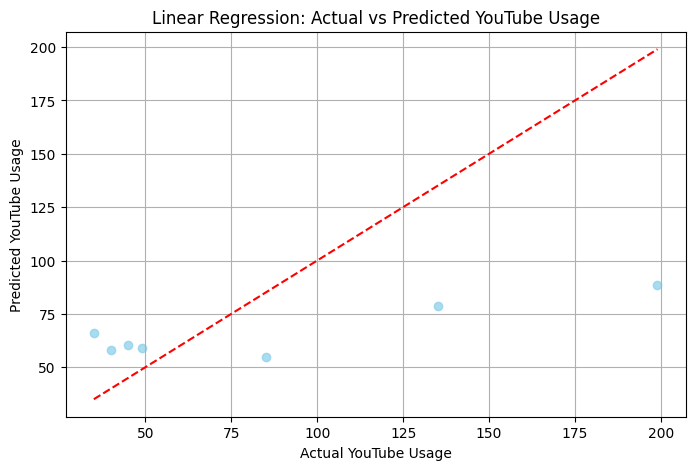

---------------------------------------------------------------------


Decision Tree Regression (YouTube Usage):
 - RMSE: 47.85
 - MAE: 39.00
 - R² Score: 0.30


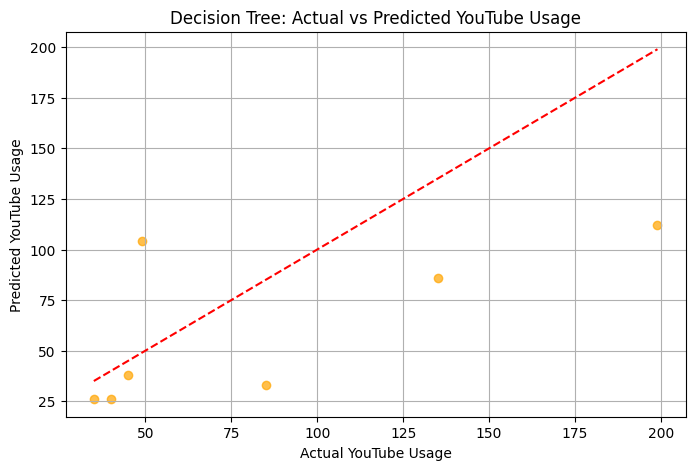

---------------------------------------------------------------------


Random Forest Regression (YouTube Usage):
 - RMSE: 46.95
 - MAE: 34.72
 - R² Score: 0.33


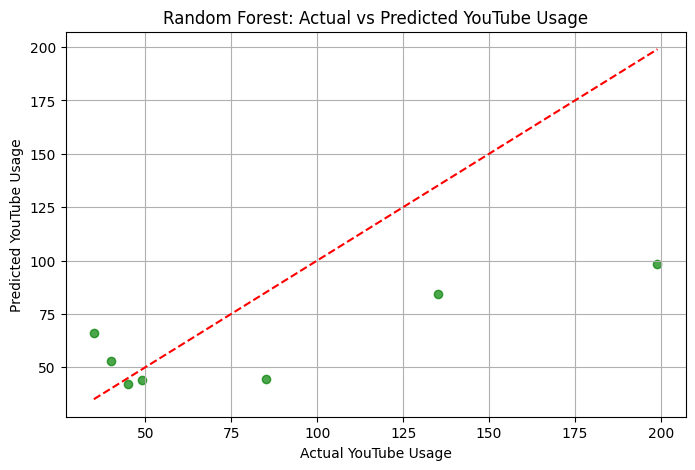

---------------------------------------------------------------------

YouTube Usage - Support Vector Regression:
 - RMSE: 52.65
 - MAE: 38.11
 - R² Score: 0.15


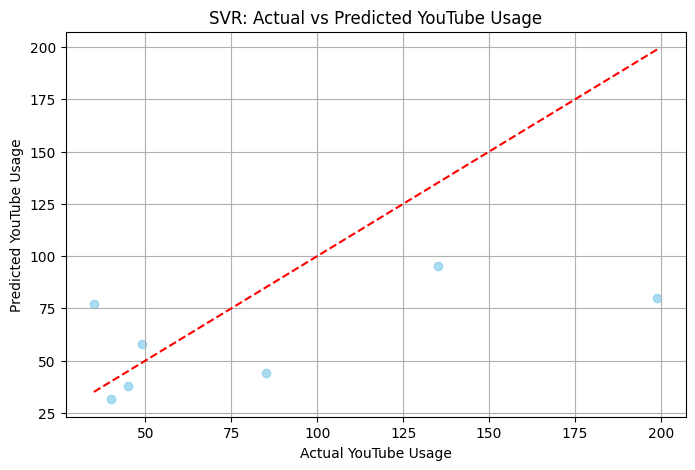

---------------------------------------------------------------------

YouTube Usage - KNN Regression:
 - RMSE: 47.04
 - MAE: 38.94
 - R² Score: 0.32


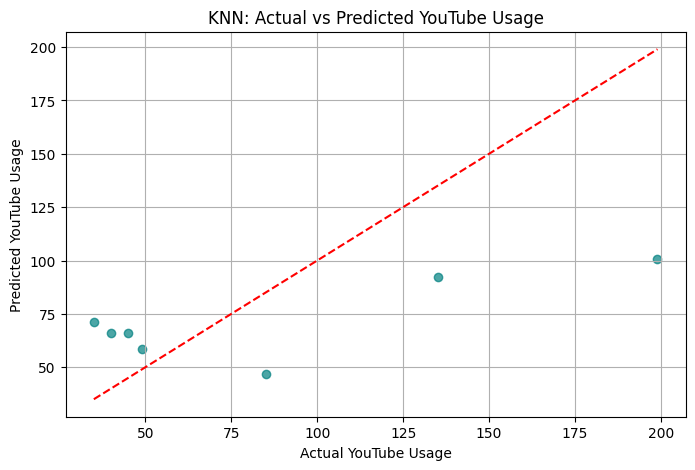

---------------------------------------------------------------------

YouTube Usage - Gradient Boosting:
 - RMSE: 49.10
 - MAE: 39.55
 - R² Score: 0.26


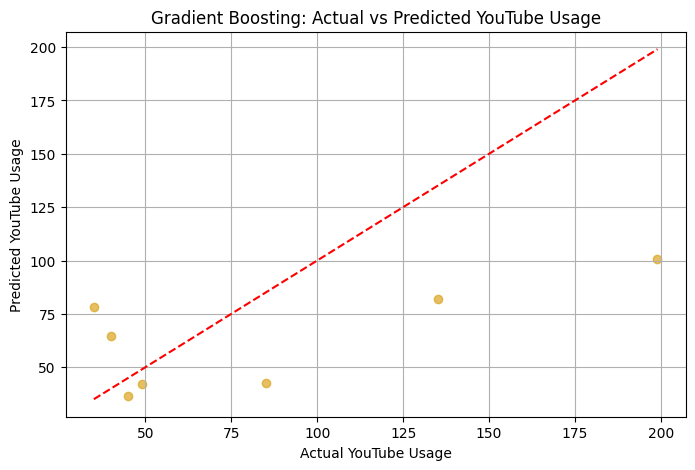

In [10]:
features = ['School Time', 'Travel Time', 'Sleep Time', 'Sleep Quality',
            'Social Interaction', 'Homework/Project']
X = df[features]
y = df['Youtube Usage']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression (YouTube Usage):")
print(f" - RMSE: {rmse_lr:.2f}")
print(f" - MAE: {mae_lr:.2f}")
print(f" - R² Score: {r2_lr:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual YouTube Usage")
plt.ylabel("Predicted YouTube Usage")
plt.title("Linear Regression: Actual vs Predicted YouTube Usage")
plt.grid(True)
plt.show()

print("---------------------------------------------------------------------")
print()

model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Regression (YouTube Usage):")
print(f" - RMSE: {rmse_dt:.2f}")
print(f" - MAE: {mae_dt:.2f}")
print(f" - R² Score: {r2_dt:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_dt, alpha=0.7, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual YouTube Usage")
plt.ylabel("Predicted YouTube Usage")
plt.title("Decision Tree: Actual vs Predicted YouTube Usage")
plt.grid(True)
plt.show()

print("---------------------------------------------------------------------")
print()

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression (YouTube Usage):")
print(f" - RMSE: {rmse_rf:.2f}")
print(f" - MAE: {mae_rf:.2f}")
print(f" - R² Score: {r2_rf:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual YouTube Usage")
plt.ylabel("Predicted YouTube Usage")
plt.title("Random Forest: Actual vs Predicted YouTube Usage")
plt.grid(True)
plt.show()

print("---------------------------------------------------------------------")
print()


scaler_XYT = StandardScaler()
scaler_yYT = StandardScaler()

X_train_scaled_YT = scaler_XYT.fit_transform(X_train)
X_test_scaled_YT = scaler_XYT.transform(X_test)
y_train_scaled_YT = scaler_yYT.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# SVR for YouTube Usage
svr_YT = SVR(kernel='rbf')
svr_YT.fit(X_train_scaled_YT, y_train_scaled_YT)
y_pred_svr_scaled_YT = svr_YT.predict(X_test_scaled_YT)
y_pred_svr_YT = scaler_yYT.inverse_transform(y_pred_svr_scaled_YT.reshape(-1, 1))

print("YouTube Usage - Support Vector Regression:")
print(f" - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_svr_YT)):.2f}")
print(f" - MAE: {mean_absolute_error(y_test, y_pred_svr_YT):.2f}")
print(f" - R² Score: {r2_score(y_test, y_pred_svr_YT):.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_svr_YT, alpha=0.7, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual YouTube Usage")
plt.ylabel("Predicted YouTube Usage")
plt.title("SVR: Actual vs Predicted YouTube Usage")
plt.grid(True)
plt.show()

print("---------------------------------------------------------------------")
print()

# KNN for YouTube Usage
knn_YT = KNeighborsRegressor(n_neighbors=5)
knn_YT.fit(X_train, y_train)
y_pred_knn_YT = knn_YT.predict(X_test)

print("YouTube Usage - KNN Regression:")
print(f" - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_knn_YT)):.2f}")
print(f" - MAE: {mean_absolute_error(y_test, y_pred_knn_YT):.2f}")
print(f" - R² Score: {r2_score(y_test, y_pred_knn_YT):.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_knn_YT, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual YouTube Usage")
plt.ylabel("Predicted YouTube Usage")
plt.title("KNN: Actual vs Predicted YouTube Usage")
plt.grid(True)
plt.show()

print("---------------------------------------------------------------------")
print()

# Gradient Boosting for YouTube Usage
gbr_YT = GradientBoostingRegressor(random_state=42)
gbr_YT.fit(X_train, y_train)
y_pred_gbr_YT = gbr_YT.predict(X_test)

print("YouTube Usage - Gradient Boosting:")
print(f" - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gbr_YT)):.2f}")
print(f" - MAE: {mean_absolute_error(y_test, y_pred_gbr_YT):.2f}")
print(f" - R² Score: {r2_score(y_test, y_pred_gbr_YT):.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_gbr_YT, alpha=0.7, color='goldenrod')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual YouTube Usage")
plt.ylabel("Predicted YouTube Usage")
plt.title("Gradient Boosting: Actual vs Predicted YouTube Usage")
plt.grid(True)
plt.show()

Instagram Usage - Linear Regression:
 - RMSE: 20.58
 - MAE: 17.94
 - R² Score: 0.27


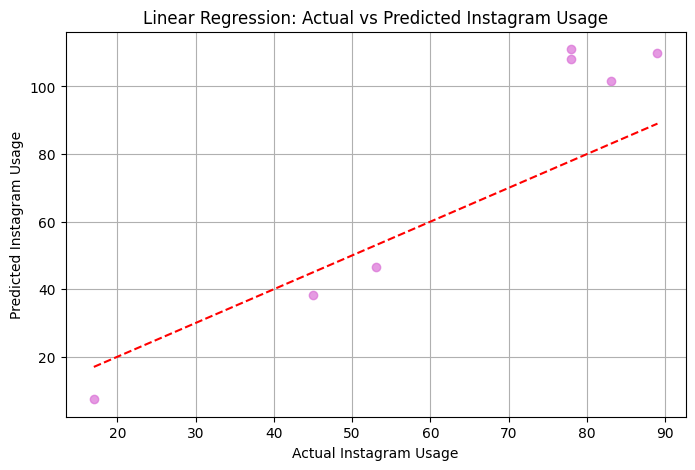

---------------------------------------------------------------------

Instagram Usage - Decision Tree:
 - RMSE: 17.94
 - MAE: 14.00
 - R² Score: 0.45


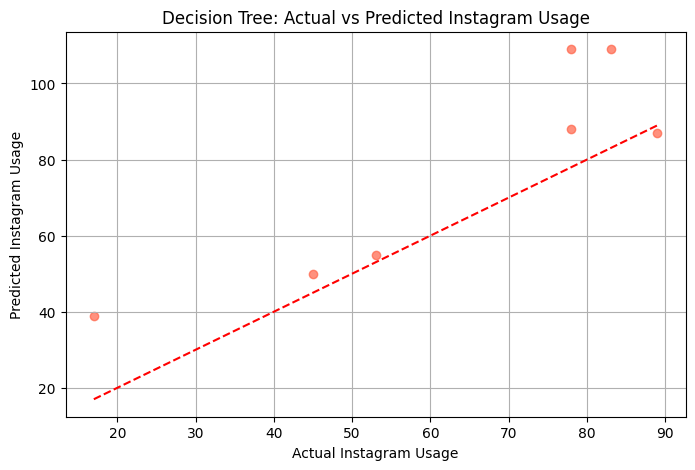

---------------------------------------------------------------------

Instagram Usage - Random Forest:
 - RMSE: 15.97
 - MAE: 14.41
 - R² Score: 0.56


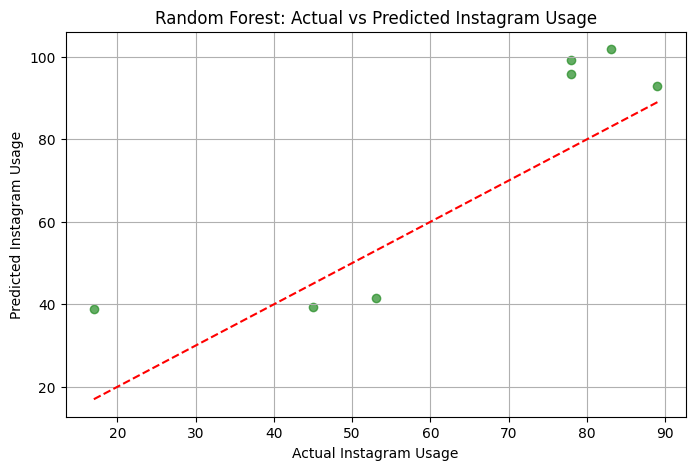

---------------------------------------------------------------------

Instagram Usage - Support Vector Regression:
 - RMSE: 10.92
 - MAE: 9.88
 - R² Score: 0.79


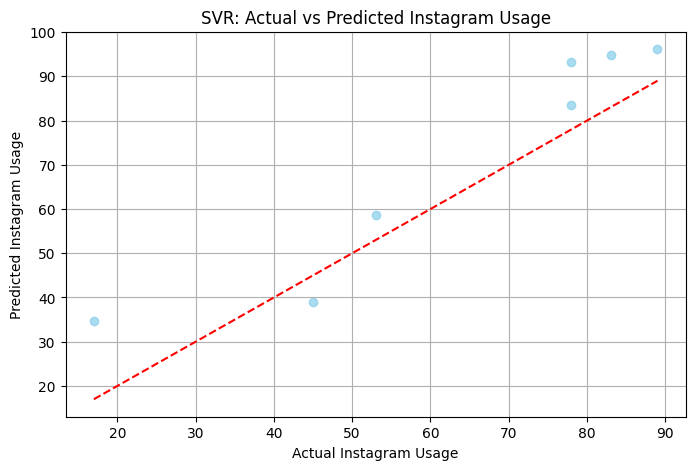

---------------------------------------------------------------------

Instagram Usage - KNN Regression:
 - RMSE: 15.72
 - MAE: 14.43
 - R² Score: 0.57


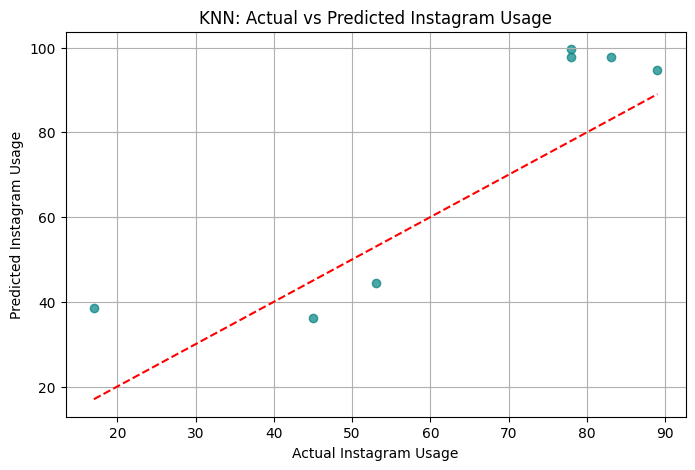

---------------------------------------------------------------------

Instagram Usage - Gradient Boosting:
 - RMSE: 16.84
 - MAE: 13.99
 - R² Score: 0.51


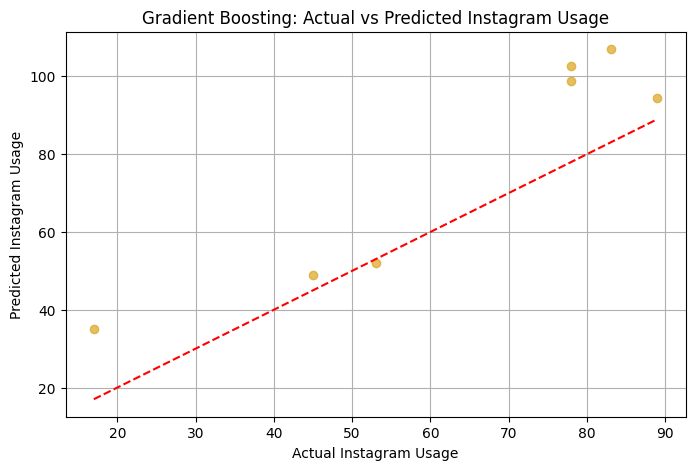

In [8]:
# 1. Predicting Instagram Usage
X_instagram = df[features]
y_instagram = df['Instagram Usage']
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_instagram, y_instagram, test_size=0.2, random_state=42)

lr_i = LinearRegression()
lr_i.fit(X_train_i, y_train_i)
y_pred_lr_i = lr_i.predict(X_test_i)

print("Instagram Usage - Linear Regression:")
print(f" - RMSE: {np.sqrt(mean_squared_error(y_test_i, y_pred_lr_i)):.2f}")
print(f" - MAE: {mean_absolute_error(y_test_i, y_pred_lr_i):.2f}")
print(f" - R² Score: {r2_score(y_test_i, y_pred_lr_i):.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_i, y_pred_lr_i, alpha=0.7, color='orchid')
plt.plot([y_test_i.min(), y_test_i.max()], [y_test_i.min(), y_test_i.max()], 'r--')
plt.xlabel("Actual Instagram Usage")
plt.ylabel("Predicted Instagram Usage")
plt.title("Linear Regression: Actual vs Predicted Instagram Usage")
plt.grid(True)
plt.show()

print("---------------------------------------------------------------------")
print()

dt_i = DecisionTreeRegressor(random_state=42)
dt_i.fit(X_train_i, y_train_i)
y_pred_dt_i = dt_i.predict(X_test_i)

print("Instagram Usage - Decision Tree:")
print(f" - RMSE: {np.sqrt(mean_squared_error(y_test_i, y_pred_dt_i)):.2f}")
print(f" - MAE: {mean_absolute_error(y_test_i, y_pred_dt_i):.2f}")
print(f" - R² Score: {r2_score(y_test_i, y_pred_dt_i):.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_i, y_pred_dt_i, alpha=0.7, color='tomato')
plt.plot([y_test_i.min(), y_test_i.max()], [y_test_i.min(), y_test_i.max()], 'r--')
plt.xlabel("Actual Instagram Usage")
plt.ylabel("Predicted Instagram Usage")
plt.title("Decision Tree: Actual vs Predicted Instagram Usage")
plt.grid(True)
plt.show()

print("---------------------------------------------------------------------")
print()

rf_i = RandomForestRegressor(random_state=42)
rf_i.fit(X_train_i, y_train_i)
y_pred_rf_i = rf_i.predict(X_test_i)

print("Instagram Usage - Random Forest:")
print(f" - RMSE: {np.sqrt(mean_squared_error(y_test_i, y_pred_rf_i)):.2f}")
print(f" - MAE: {mean_absolute_error(y_test_i, y_pred_rf_i):.2f}")
print(f" - R² Score: {r2_score(y_test_i, y_pred_rf_i):.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_i, y_pred_rf_i, alpha=0.7, color='forestgreen')
plt.plot([y_test_i.min(), y_test_i.max()], [y_test_i.min(), y_test_i.max()], 'r--')
plt.xlabel("Actual Instagram Usage")
plt.ylabel("Predicted Instagram Usage")
plt.title("Random Forest: Actual vs Predicted Instagram Usage")
plt.grid(True)
plt.show()

print("---------------------------------------------------------------------")
print()

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train_i)
X_test_scaled = scaler_X.transform(X_test_i)
y_train_scaled = scaler_y.fit_transform(y_train_i.values.reshape(-1, 1)).ravel()

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train_scaled)
y_pred_svr_scaled = svr.predict(X_test_scaled)
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1))

print("Instagram Usage - Support Vector Regression:")
print(f" - RMSE: {np.sqrt(mean_squared_error(y_test_i, y_pred_svr)):.2f}")
print(f" - MAE: {mean_absolute_error(y_test_i, y_pred_svr):.2f}")
print(f" - R² Score: {r2_score(y_test_i, y_pred_svr):.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_i, y_pred_svr, alpha=0.7, color='skyblue')
plt.plot([y_test_i.min(), y_test_i.max()], [y_test_i.min(), y_test_i.max()], 'r--')
plt.xlabel("Actual Instagram Usage")
plt.ylabel("Predicted Instagram Usage")
plt.title("SVR: Actual vs Predicted Instagram Usage")
plt.grid(True)
plt.show()

print("---------------------------------------------------------------------")
print()

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_i, y_train_i)
y_pred_knn = knn.predict(X_test_i)

print("Instagram Usage - KNN Regression:")
print(f" - RMSE: {np.sqrt(mean_squared_error(y_test_i, y_pred_knn)):.2f}")
print(f" - MAE: {mean_absolute_error(y_test_i, y_pred_knn):.2f}")
print(f" - R² Score: {r2_score(y_test_i, y_pred_knn):.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_i, y_pred_knn, alpha=0.7, color='teal')
plt.plot([y_test_i.min(), y_test_i.max()], [y_test_i.min(), y_test_i.max()], 'r--')
plt.xlabel("Actual Instagram Usage")
plt.ylabel("Predicted Instagram Usage")
plt.title("KNN: Actual vs Predicted Instagram Usage")
plt.grid(True)
plt.show()

print("---------------------------------------------------------------------")
print()

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_i, y_train_i)
y_pred_gbr = gbr.predict(X_test_i)

print("Instagram Usage - Gradient Boosting:")
print(f" - RMSE: {np.sqrt(mean_squared_error(y_test_i, y_pred_gbr)):.2f}")
print(f" - MAE: {mean_absolute_error(y_test_i, y_pred_gbr):.2f}")
print(f" - R² Score: {r2_score(y_test_i, y_pred_gbr):.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_i, y_pred_gbr, alpha=0.7, color='goldenrod')
plt.plot([y_test_i.min(), y_test_i.max()], [y_test_i.min(), y_test_i.max()], 'r--')
plt.xlabel("Actual Instagram Usage")
plt.ylabel("Predicted Instagram Usage")
plt.title("Gradient Boosting: Actual vs Predicted Instagram Usage")
plt.grid(True)
plt.show()


Reddit Usage - Linear Regression:
 - RMSE: 19.91
 - MAE: 16.19
 - R² Score: 0.17


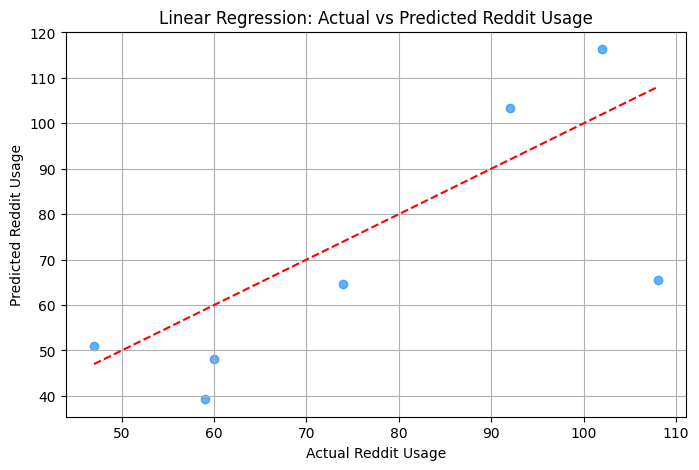

---------------------------------------------------------------------

Reddit Usage - Decision Tree:
 - RMSE: 10.47
 - MAE: 9.29
 - R² Score: 0.77


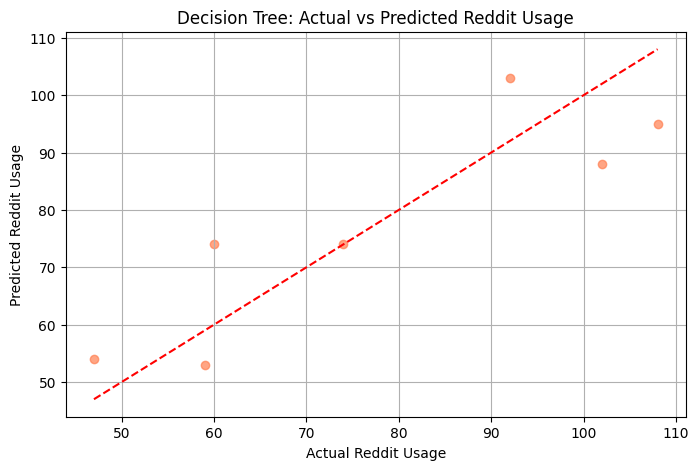

---------------------------------------------------------------------

Reddit Usage - Random Forest:
 - RMSE: 8.33
 - MAE: 7.16
 - R² Score: 0.85


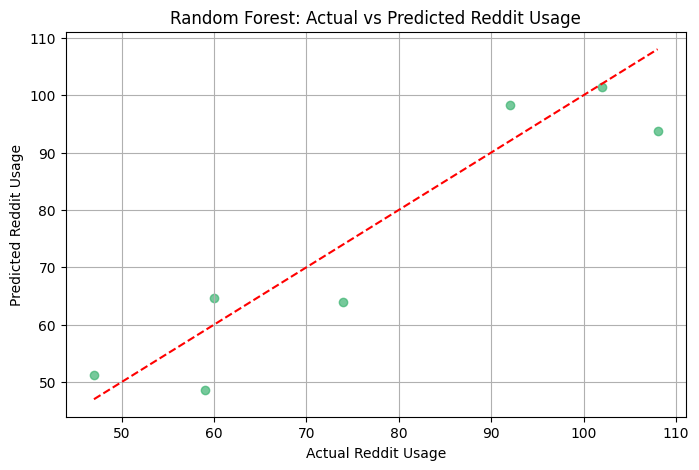

---------------------------------------------------------------------

Reddit Usage - Support Vector Regression:
 - RMSE: 17.02
 - MAE: 11.67
 - R² Score: 0.39


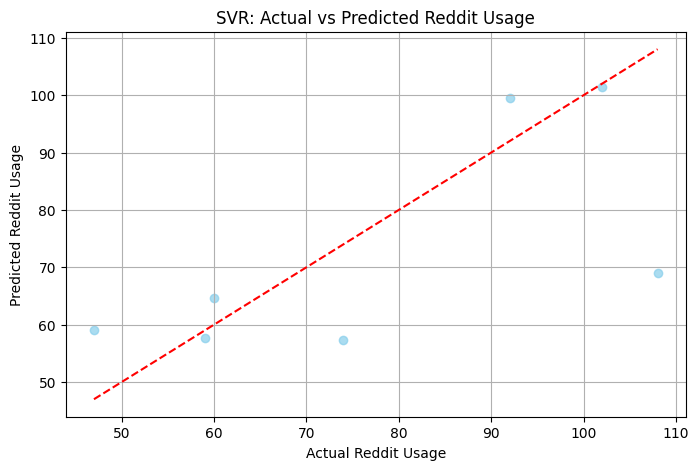

---------------------------------------------------------------------

Reddit Usage - KNN Regression:
 - RMSE: 15.41
 - MAE: 12.14
 - R² Score: 0.50


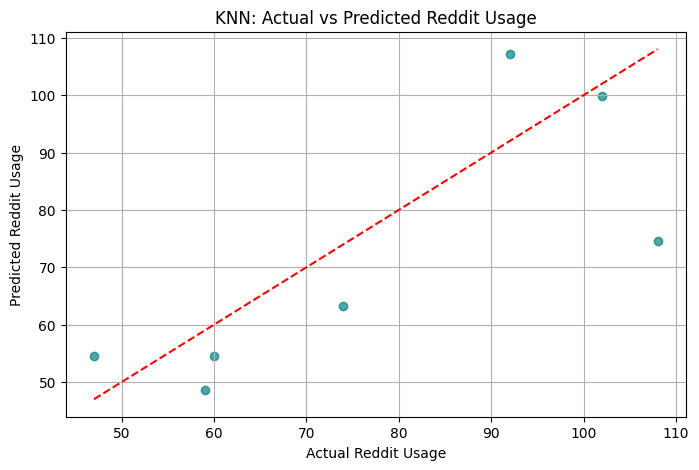

---------------------------------------------------------------------

Reddit Usage - Gradient Boosting:
 - RMSE: 12.05
 - MAE: 10.80
 - R² Score: 0.69


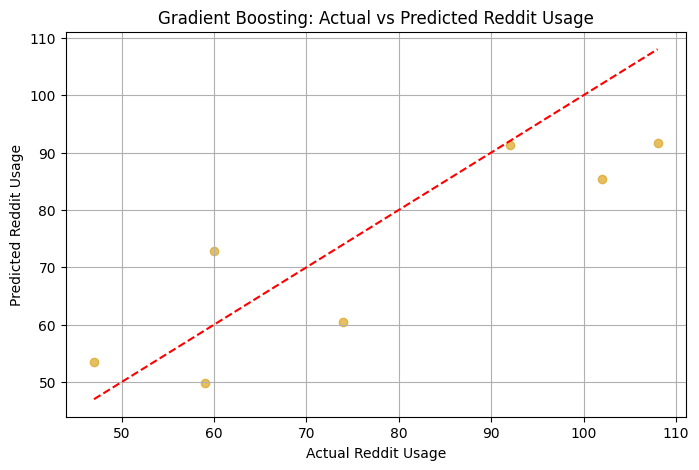

In [11]:
# 3. Predicting Reddit Usage
X_reddit = df[features]
y_reddit = df['Reddit Usage']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reddit, y_reddit, test_size=0.2, random_state=42)

lr_r = LinearRegression()
lr_r.fit(X_train_r, y_train_r)
y_pred_lr_r = lr_r.predict(X_test_r)

print("Reddit Usage - Linear Regression:")
print(f" - RMSE: {np.sqrt(mean_squared_error(y_test_r, y_pred_lr_r)):.2f}")
print(f" - MAE: {mean_absolute_error(y_test_r, y_pred_lr_r):.2f}")
print(f" - R² Score: {r2_score(y_test_r, y_pred_lr_r):.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_r, y_pred_lr_r, alpha=0.7, color='dodgerblue')
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')
plt.xlabel("Actual Reddit Usage")
plt.ylabel("Predicted Reddit Usage")
plt.title("Linear Regression: Actual vs Predicted Reddit Usage")
plt.grid(True)
plt.show()

print("---------------------------------------------------------------------")
print()

dt_r = DecisionTreeRegressor(random_state=42)
dt_r.fit(X_train_r, y_train_r)
y_pred_dt_r = dt_r.predict(X_test_r)

print("Reddit Usage - Decision Tree:")
print(f" - RMSE: {np.sqrt(mean_squared_error(y_test_r, y_pred_dt_r)):.2f}")
print(f" - MAE: {mean_absolute_error(y_test_r, y_pred_dt_r):.2f}")
print(f" - R² Score: {r2_score(y_test_r, y_pred_dt_r):.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_r, y_pred_dt_r, alpha=0.7, color='coral')
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')
plt.xlabel("Actual Reddit Usage")
plt.ylabel("Predicted Reddit Usage")
plt.title("Decision Tree: Actual vs Predicted Reddit Usage")
plt.grid(True)
plt.show()

print("---------------------------------------------------------------------")
print()

rf_r = RandomForestRegressor(random_state=42)
rf_r.fit(X_train_r, y_train_r)
y_pred_rf_r = rf_r.predict(X_test_r)

print("Reddit Usage - Random Forest:")
print(f" - RMSE: {np.sqrt(mean_squared_error(y_test_r, y_pred_rf_r)):.2f}")
print(f" - MAE: {mean_absolute_error(y_test_r, y_pred_rf_r):.2f}")
print(f" - R² Score: {r2_score(y_test_r, y_pred_rf_r):.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_r, y_pred_rf_r, alpha=0.7, color='mediumseagreen')
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')
plt.xlabel("Actual Reddit Usage")
plt.ylabel("Predicted Reddit Usage")
plt.title("Random Forest: Actual vs Predicted Reddit Usage")
plt.grid(True)
plt.show()

print("---------------------------------------------------------------------")
print()


scaler_XR = StandardScaler()
scaler_yR = StandardScaler()

X_train_scaled_r = scaler_XR.fit_transform(X_train_r)
X_test_scaled_r = scaler_XR.transform(X_test_r)
y_train_scaled_r = scaler_yR.fit_transform(y_train_r.values.reshape(-1, 1)).ravel()

# SVR for Reddit Usage
svr_r = SVR(kernel='rbf')
svr_r.fit(X_train_scaled_r, y_train_scaled_r)
y_pred_svr_scaled_r = svr_r.predict(X_test_scaled_r)
y_pred_svr_r = scaler_yR.inverse_transform(y_pred_svr_scaled_r.reshape(-1, 1))

print("Reddit Usage - Support Vector Regression:")
print(f" - RMSE: {np.sqrt(mean_squared_error(y_test_r, y_pred_svr_r)):.2f}")
print(f" - MAE: {mean_absolute_error(y_test_r, y_pred_svr_r):.2f}")
print(f" - R² Score: {r2_score(y_test_r, y_pred_svr_r):.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_r, y_pred_svr_r, alpha=0.7, color='skyblue')
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')
plt.xlabel("Actual Reddit Usage")
plt.ylabel("Predicted Reddit Usage")
plt.title("SVR: Actual vs Predicted Reddit Usage")
plt.grid(True)
plt.show()

print("---------------------------------------------------------------------")
print()

# KNN for Reddit Usage
knn_r = KNeighborsRegressor(n_neighbors=5)
knn_r.fit(X_train_r, y_train_r)
y_pred_knn_r = knn_r.predict(X_test_r)

print("Reddit Usage - KNN Regression:")
print(f" - RMSE: {np.sqrt(mean_squared_error(y_test_r, y_pred_knn_r)):.2f}")
print(f" - MAE: {mean_absolute_error(y_test_r, y_pred_knn_r):.2f}")
print(f" - R² Score: {r2_score(y_test_r, y_pred_knn_r):.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_r, y_pred_knn_r, alpha=0.7, color='teal')
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')
plt.xlabel("Actual Reddit Usage")
plt.ylabel("Predicted Reddit Usage")
plt.title("KNN: Actual vs Predicted Reddit Usage")
plt.grid(True)
plt.show()

print("---------------------------------------------------------------------")
print()

# Gradient Boosting for Reddit Usage
gbr_r = GradientBoostingRegressor(random_state=42)
gbr_r.fit(X_train_r, y_train_r)
y_pred_gbr_r = gbr_r.predict(X_test_r)

print("Reddit Usage - Gradient Boosting:")
print(f" - RMSE: {np.sqrt(mean_squared_error(y_test_r, y_pred_gbr_r)):.2f}")
print(f" - MAE: {mean_absolute_error(y_test_r, y_pred_gbr_r):.2f}")
print(f" - R² Score: {r2_score(y_test_r, y_pred_gbr_r):.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_r, y_pred_gbr_r, alpha=0.7, color='goldenrod')
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')
plt.xlabel("Actual Reddit Usage")
plt.ylabel("Predicted Reddit Usage")
plt.title("Gradient Boosting: Actual vs Predicted Reddit Usage")
plt.grid(True)
plt.show()
